## 1. Load a Grayscale Image and Compute its 2D Fourier Transform

To analyze an image in the frequency domain, we first need to compute its 2D Discrete Fourier Transform (DFT).

In [6]:
#! pip install opencv-python

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load image in grayscale
image = cv2.imread('PNG_transparency_demonstration_1.png', cv2.IMREAD_GRAYSCALE)

# Compute 2D FFT
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Shift zero freq. to center

IndexError: cannot do a non-empty take from an empty axes.

## 2 Visualize the Magnitude Spectrum of the Image

The magnitude spectrum highlights frequency components of the image. Use a logarithmic scale to better visualize differences.


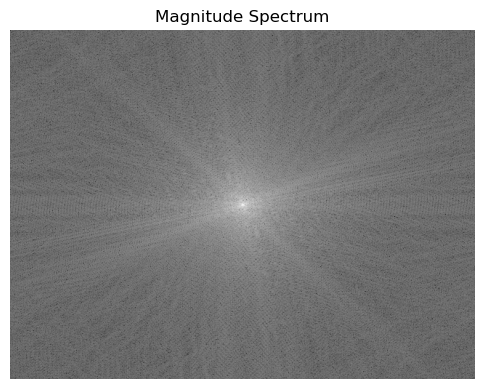

In [ ]:
# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

## 3 Apply a Low-Pass and High-Pass Filter in the Frequency Domain

Create a mask in the frequency domain to filter out high or low frequencies.

In [ ]:
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2

# Create a low-pass filter mask (circle in the center)
mask_lp = np.zeros((rows, cols), np.uint8)
r = 50  # Radius
cv2.circle(mask_lp, (ccol, crow), r, 1, thickness=-1)

# Create high-pass mask as complement
mask_hp = 1 - mask_lp

# Apply the masks
fshift_lp = fshift * mask_lp
fshift_hp = fshift * mask_hp

## 4 Reconstruct the Image from the Filtered Spectrum

To get the filtered image, apply the inverse Fourier transform.


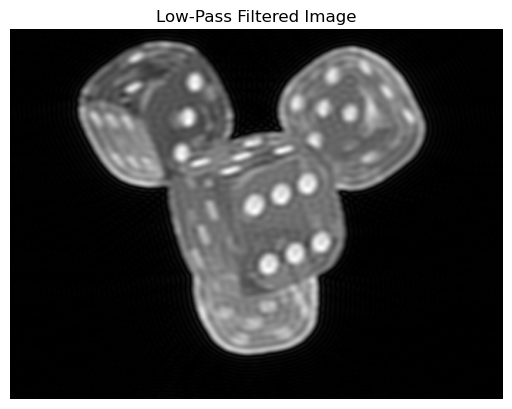

In [ ]:
# Inverse shift and IFFT for low-pass
f_ishift_lp = np.fft.ifftshift(fshift_lp)
img_back_lp = np.fft.ifft2(f_ishift_lp)
img_back_lp = np.abs(img_back_lp)

# Display the result
plt.imshow(img_back_lp, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')
plt.show()

## 5 Load an Audio Signal and Compute its Spectrogram

Use the Librosa library to load an audio file and compute the spectrogram using STFT.


In [ ]:
#! pip install librosa

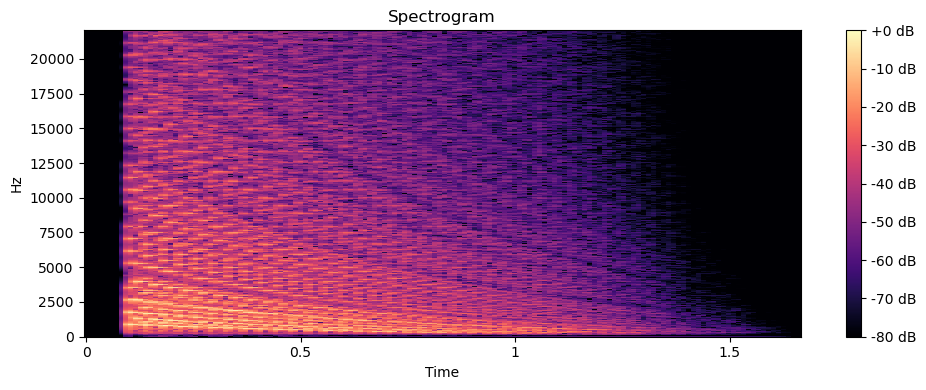

In [ ]:
import librosa
import librosa.display

# Load audio file
y, sr = librosa.load('mixkit-arcade-retro-game-over-213.wav', sr=None)

# Compute STFT
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Display spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

## 6 Compare Time-Domain and Frequency-Domain Representations

Plot both the waveform and its corresponding frequency representation.


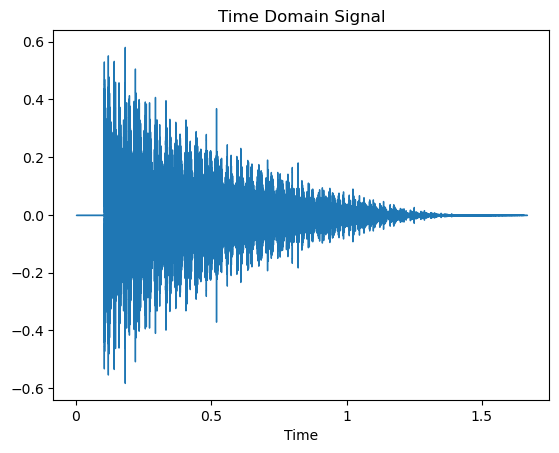

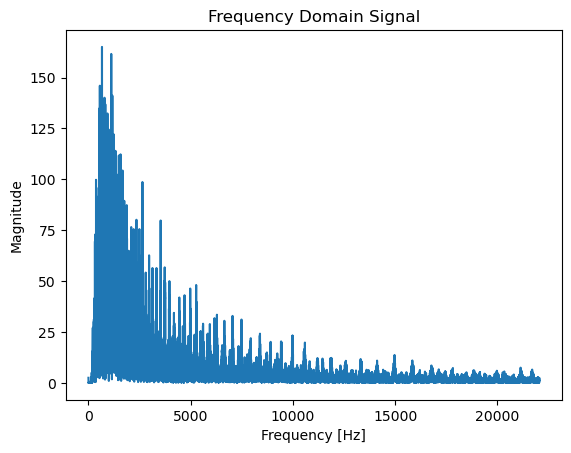

In [ ]:
# Plot waveform (time domain)
plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.title('Time Domain Signal')

# Plot magnitude spectrum (frequency domain)
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(Y), 1/sr)
plt.figure()
plt.plot(freqs[:len(freqs)//2], np.abs(Y[:len(Y)//2]))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

## 7 (Optional) Apply a Denoising Filter Using Frequency Domain Processing

Simple denoising can be performed by suppressing very high-frequency components.


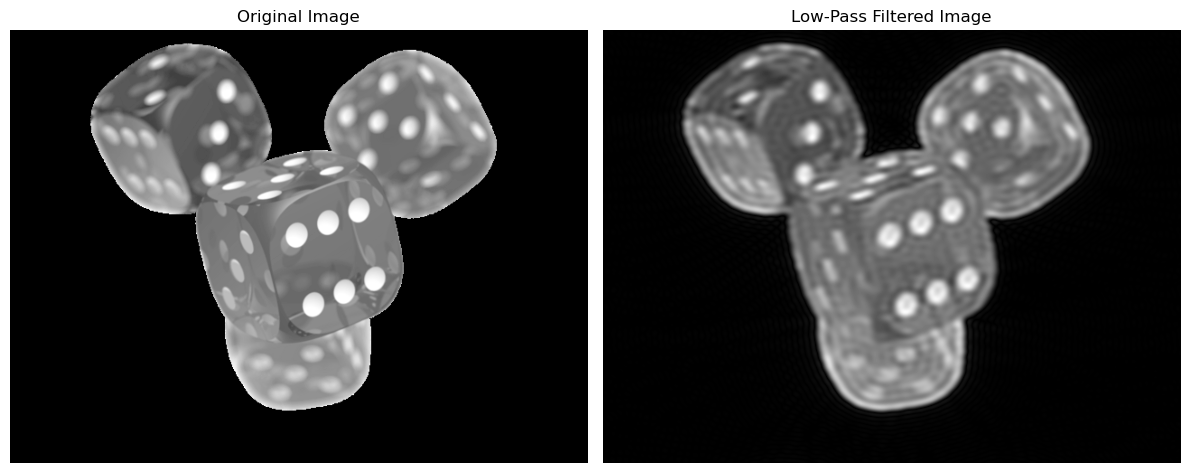

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load image in grayscale
image = cv2.imread('PNG_transparency_demonstration_1.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Compute 2D FFT and shift zero frequency to the center
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Create a low-pass mask
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
r = 50  # radius of the low-pass circle

# Create a float32 mask (same shape, values between 0 and 1)
mask_lp = np.zeros((rows, cols), dtype=np.float32)
cv2.circle(mask_lp, (ccol, crow), r, 1, thickness=-1)

# Apply mask to the shifted FFT
fshift_lp = fshift * mask_lp

# Inverse shift and inverse FFT to reconstruct image
f_ishift = np.fft.ifftshift(fshift_lp)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)  # Get magnitude (real part only)

# Display original and filtered image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## Band-Pass Filter for Image

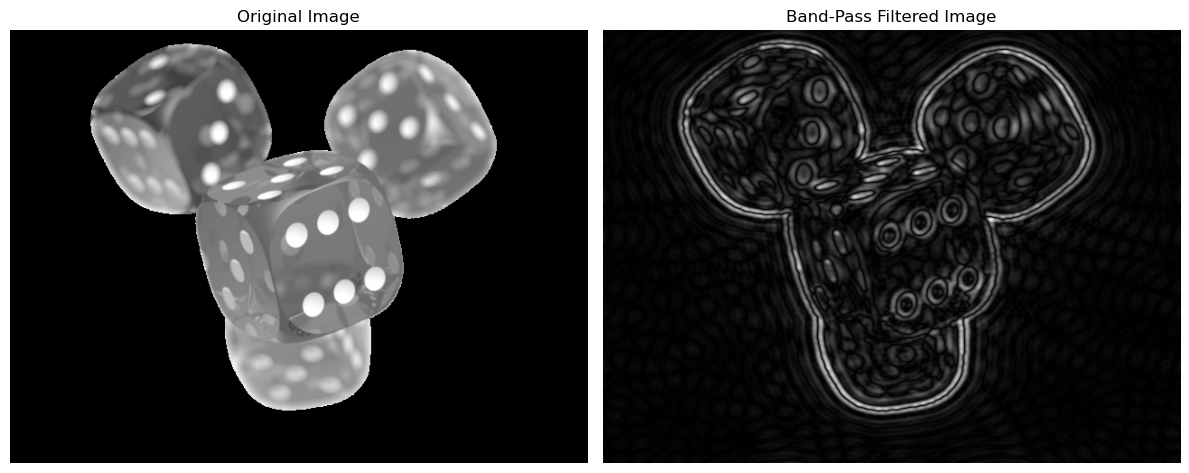

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load image in grayscale
image = cv2.imread('PNG_transparency_demonstration_1.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Compute 2D FFT and shift zero frequency to the center
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Get dimensions and center
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Define inner and outer radii for the band-pass filter
r1 = 20   # Inner radius (removes low frequencies)
r2 = 80   # Outer radius (removes high frequencies)

# Create band-pass mask: circle ring between r1 and r2
mask = np.zeros((rows, cols), dtype=np.float32)
cv2.circle(mask, (ccol, crow), r2, 1, thickness=-1)    # Outer circle (everything inside is 1)
cv2.circle(mask, (ccol, crow), r1, 0, thickness=-1)    # Inner circle (set center to 0 again)

# Apply the band-pass filter
fshift_bp = fshift * mask

# Inverse shift and inverse FFT to reconstruct image
f_ishift = np.fft.ifftshift(fshift_bp)
img_bandpass = np.fft.ifft2(f_ishift)
img_bandpass = np.abs(img_bandpass)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_bandpass, cmap='gray')
plt.title('Band-Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# Appendix

In [ ]:
import numpy as np
import cv2
from scipy.signal import chirp
from scipy.io.wavfile import write

## 1. Checkerboard Image and Sine Sweep

In [ ]:
# Image: Checkerboard
def generate_checkerboard(size=256, squares=8):
    block = np.kron([[1, 0] * (squares // 2), [0, 1] * (squares // 2)] * (squares // 2),
                    np.ones((size//squares, size//squares)))
    cv2.imwrite('checkerboard.png', (block * 255).astype(np.uint8))

# Audio: Sine sweep
def generate_sine_sweep(f0=100, f1=2000, duration=5, fs=44100):
    t = np.linspace(0, duration, int(fs * duration))
    y = chirp(t, f0=f0, f1=f1, t1=duration, method='linear')
    write('sine_sweep.wav', fs, (y * 32767).astype(np.int16))
    


## 2. Shapes Image and Beep Pattern

In [ ]:

# Image: Geometric shapes
def generate_shapes(size=256):
    img = np.zeros((size, size), dtype=np.uint8)
    cv2.rectangle(img, (30, 30), (100, 100), 255, -1)
    cv2.circle(img, (180, 80), 40, 255, -1)
    cv2.line(img, (50, 200), (200, 220), 255, 3)
    cv2.imwrite('shapes.png', img)

# Audio: Repeated beeps
def generate_beep(fs=44100):
    t_beep = np.linspace(0, 0.2, int(fs * 0.2))
    beep = 0.5 * np.sin(2 * np.pi * 1000 * t_beep)
    silence = np.zeros(int(fs * 0.2))
    signal = np.tile(np.concatenate((beep, silence)), 10)
    write('beep_pattern.wav', fs, (signal * 32767).astype(np.int16))
    

## 3. Barcode Image and White Noise

In [ ]:
# Image: Barcode
def generate_barcode(rows=256, cols=256, bars=60):
    img = np.ones((rows, cols), dtype=np.uint8) * 255
    for i in range(0, cols, cols // bars):
        cv2.rectangle(img, (i, 0), (i + cols // (2 * bars), rows), 0, -1)
    cv2.imwrite('barcode.png', img)

generate_barcode(rows=256, cols=256, bars=60)    
    
# Audio: White noise
def generate_white_noise(duration=5, fs=44100):
    noise = np.random.normal(0, 1, int(fs * duration))
    write('white_noise.wav', fs, (noise * 32767).astype(np.int16))


## 4. Blurred Dot and Low-Frequency Hum

In [ ]:
from scipy.ndimage import gaussian_filter

# Image: Blurred dot
def generate_blurred_dot(size=256):
    img = np.zeros((size, size))
    img[size//2, size//2] = 1
    blurred = gaussian_filter(img, sigma=10)
    cv2.imwrite('blurred_dot.png', (blurred * 255).astype(np.uint8))

# Audio: 50Hz hum
def generate_hum(freq=50, duration=5, fs=44100):
    t = np.linspace(0, duration, int(fs * duration))
    y = 0.5 * np.sin(2 * np.pi * freq * t)
    write('hum.wav', fs, (y * 32767).astype(np.int16))

## 5. Ring Image and Harmonic Tones

In [ ]:
# Image: Ring
def generate_ring(size=256):
    img = np.zeros((size, size), dtype=np.uint8)
    cv2.circle(img, (size//2, size//2), 60, 255, thickness=5)
    cv2.imwrite('ring.png', img)

# Audio: 440 Hz and 880 Hz
def generate_harmonics(fs=44100, duration=3):
    t = np.linspace(0, duration, int(fs * duration))
    y = 0.5 * np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 880 * t)
    write('harmonics.wav', fs, (y * 32767).astype(np.int16))

## 6. Diagonal Stripes and Square Wave

In [ ]:
# Diagonal stripes
def generate_diagonal_stripes(size=256, spacing=20):
    img = np.zeros((size, size), dtype=np.uint8)
    for i in range(0, size, spacing):
        cv2.line(img, (i, 0), (0, i), 255, 1)
    cv2.imwrite('diagonal_stripes.png', img)

# Square wave audio
from scipy.signal import square
def generate_square_wave(freq=500, duration=3, fs=44100):
    t = np.linspace(0, duration, int(fs * duration))
    y = 0.5 * square(2 * np.pi * freq * t)
    write('square_wave.wav', fs, (y * 32767).astype(np.int16))

## 7. Random Noise Image and AM Sine Wave

In [ ]:
# Image: Smoothed noise
def generate_smoothed_noise(size=256):
    from scipy.ndimage import gaussian_filter
    noise = np.random.rand(size, size)
    smooth = gaussian_filter(noise, sigma=10)
    cv2.imwrite('smoothed_noise.png', (smooth * 255).astype(np.uint8))

# Audio: AM (Amplitude Modulation)
def generate_am_signal(fs=44100, duration=5):
    t = np.linspace(0, duration, int(fs * duration))
    carrier = np.sin(2 * np.pi * 1000 * t)
    modulator = (1 + np.sin(2 * np.pi * 5 * t)) / 2
    y = carrier * modulator
    write('am_signal.wav', fs, (y * 32767).astype(np.int16))

## 8. Fractal Noise and Impulse Train

In [ ]:

# Image: Fractal-like noise
def generate_fractal_noise(size=256):
    from scipy.ndimage import gaussian_filter
    noise = gaussian_filter(np.random.rand(size, size), sigma=8)
    cv2.imwrite('fractal_noise.png', (noise * 255).astype(np.uint8))

# Audio: Repeating impulses
def generate_impulse_train(fs=44100, duration=5, interval=1):
    signal = np.zeros(int(fs * duration))
    for i in range(0, int(duration), interval):
        signal[i * fs] = 1.0
    write('impulse_train.wav', fs, (signal * 32767).astype(np.int16))

## 9. Grid Pattern and Fading Sine Wave

In [ ]:
# Image: Grid with gaps
def generate_broken_grid(size=256, step=32):
    img = np.zeros((size, size), dtype=np.uint8)
    for i in range(0, size, step):
        if i % 64 != 0:
            img[i, :] = 255
            img[:, i] = 255
    cv2.imwrite('broken_grid.png', img)

# Audio: Fade-in sine
def generate_fadein_sine(fs=44100, duration=5, freq=440):
    t = np.linspace(0, duration, int(fs * duration))
    envelope = np.linspace(0, 1, len(t))
    y = envelope * np.sin(2 * np.pi * freq * t)
    write('fadein_sine.wav', fs, (y * 32767).astype(np.int16))

## 10. Symmetric Shapes and Alternating Noise

In [ ]:

# Image: Symmetric pattern
def generate_symmetric_shapes(size=256):
    img = np.zeros((size, size), dtype=np.uint8)
    cv2.circle(img, (size//4, size//2), 30, 255, -1)
    cv2.circle(img, (3*size//4, size//2), 30, 255, -1)
    cv2.line(img, (size//2, 0), (size//2, size), 255, 2)
    cv2.imwrite('symmetric_shapes.png', img)

# Audio: Alternating noise and silence
def generate_onoff_noise(fs=44100, duration=5):
    noise = np.random.normal(0, 0.5, fs//2)
    silence = np.zeros(fs//2)
    pattern = np.tile(np.concatenate([noise, silence]), duration // 1)
    write('onoff_noise.wav', fs, (pattern * 32767).astype(np.int16))

## 11. Horizontal Edge and Pulse Train

In [ ]:

# Image: Half black, half white
def generate_edge_image(size=256):
    img = np.zeros((size, size), dtype=np.uint8)
    img[:, size//2:] = 255
    cv2.imwrite('half_edge.png', img)

# Audio: Pulse train
def generate_pulse_train(fs=44100, duration=5):
    signal = np.zeros(int(fs * duration))
    for i in range(0, len(signal), fs//10):
        signal[i:i+10] = 1
    write('pulse_train.wav', fs, (signal * 32767).astype(np.int16))

## 12. Triangle Image and Triangle Wave Audio

In [ ]:

from scipy.signal import sawtooth

# Image: Triangle waveform pattern (horizontal)
def generate_triangle_pattern(size=256):
    img = np.tile(np.linspace(0, 255, size, dtype=np.uint8), (size, 1))
    triangle = np.abs((img.astype(float) - 127.5) * 2)
    cv2.imwrite('triangle_pattern.png', triangle.astype(np.uint8))

# Audio: Triangle wave
def generate_triangle_wave(freq=500, duration=3, fs=44100):
    t = np.linspace(0, duration, int(fs * duration))
    y = 0.5 * sawtooth(2 * np.pi * freq * t, 0.5)
    write('triangle_wave.wav', fs, (y * 32767).astype(np.int16))

## 13. Vertical Line and High-Frequency Burst

In [ ]:

# Image: Vertical line in center
def generate_vertical_line(size=256):
    img = np.zeros((size, size), dtype=np.uint8)
    img[:, size//2] = 255
    cv2.imwrite('vertical_line.png', img)

# Audio: High-frequency burst
def generate_burst(fs=44100, duration=2, freq=3000):
    t = np.linspace(0, duration, int(fs * duration))
    y = np.zeros_like(t)
    y[:fs//5] = 0.5 * np.sin(2 * np.pi * freq * t[:fs//5])
    write('burst.wav', fs, (y * 32767).astype(np.int16))

## 14. Gradient and Chirp

In [ ]:

# Image: Horizontal gradient
def generate_gradient(size=256):
    img = np.tile(np.linspace(0, 255, size, dtype=np.uint8), (size, 1))
    cv2.imwrite('gradient.png', img)

# Audio: Linear chirp
def generate_chirp(f0=100, f1=8000, duration=3, fs=44100):
    from scipy.signal import chirp
    t = np.linspace(0, duration, int(fs * duration))
    y = chirp(t, f0=f0, f1=f1, t1=duration, method='linear')
    write('chirp.wav', fs, (y * 32767).astype(np.int16))

## 15. Overlapping Shapes and Tone + Noise

In [ ]:

# Image: Overlapping shapes
def generate_overlapping_shapes(size=256):
    img = np.zeros((size, size), dtype=np.uint8)
    cv2.circle(img, (90, 90), 40, 255, -1)
    cv2.rectangle(img, (100, 100), (180, 180), 255, -1)
    cv2.imwrite('overlapping_shapes.png', img)

# Audio: Sine tone + noise
def generate_tone_noise_mix(fs=44100, duration=3):
    t = np.linspace(0, duration, int(fs * duration))
    tone = 0.4 * np.sin(2 * np.pi * 440 * t)
    noise = 0.6 * np.random.normal(0, 1, len(t))
    mix = tone + noise
    write('tone_noise_mix.wav', fs, (mix * 32767 / np.max(np.abs(mix))).astype(np.int16))

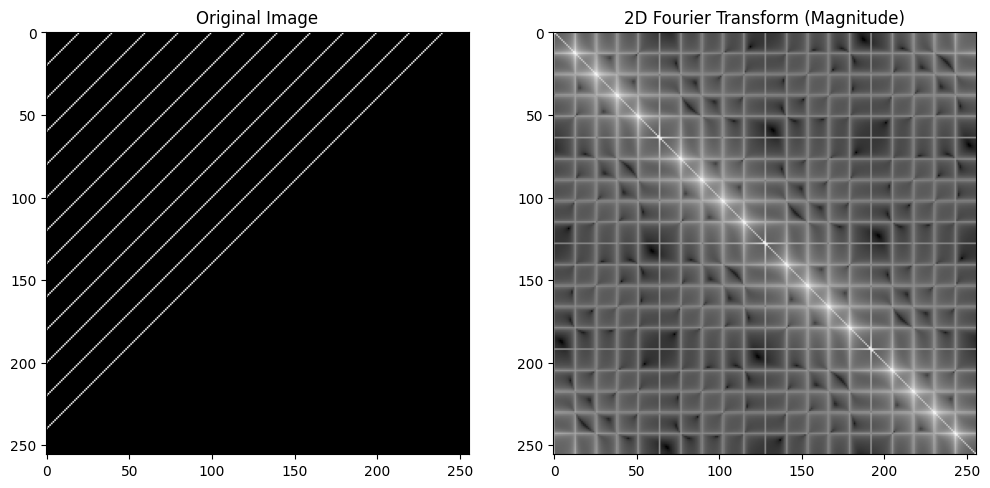

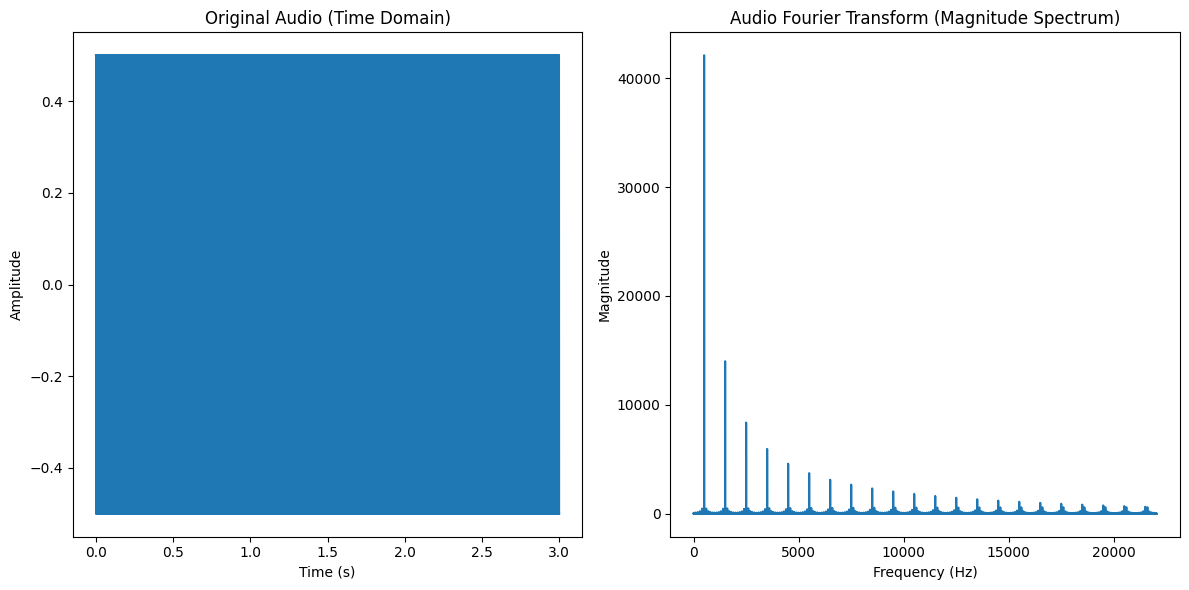


--- Time/Frequency Domain Comparison ---
Image:
-   The diagonal stripes in the image create distinct frequency components in the Fourier Transform, oriented perpendicularly to the stripes.
-   The bright spots in the center of the Fourier Transform represent the low-frequency components (the overall brightness of the image).

Audio:
-   The square wave in the time domain is a periodic signal with sharp transitions.
-   The frequency domain shows a strong peak at 500 Hz (the fundamental frequency) and peaks at odd multiples (harmonics), characteristic of a square wave.


In [ ]:
import numpy as np
import cv2
from scipy.signal import square
from scipy.io.wavfile import write
from scipy.fft import fft, fftfreq, fft2, fftshift
import matplotlib.pyplot as plt

# Image: Diagonal stripes
def generate_diagonal_stripes(size=256, spacing=20):
    img = np.zeros((size, size), dtype=np.uint8)
    for i in range(0, size, spacing):
        cv2.line(img, (i, 0), (0, i), 255, 1)
    cv2.imwrite('diagonal_stripes.png', img)
    return img  # Return the image data

# Audio: Square wave
def generate_square_wave(freq=500, duration=3, fs=44100):
    t = np.linspace(0, duration, int(fs * duration))
    y = 0.5 * square(2 * np.pi * freq * t)
    write('square_wave.wav', fs, (y * 32767).astype(np.int16))
    return y, fs, t  # Return audio data

# Analysis and Visualization
def analyze_signals(image, audio_data):
    audio, fs, t = audio_data

    # --- Image Analysis ---
    # 2D Fourier Transform
    f_img = fftshift(fft2(image))  # Center the zero-frequency component

    # Visualization
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(np.log(np.abs(f_img) + 1), cmap='gray')  # Log scale for better visualization
    plt.title('2D Fourier Transform (Magnitude)')

    plt.show()

    # --- Audio Analysis ---
    # 1D Fourier Transform
    f_audio = fft(audio)
    freqs = fftfreq(len(audio), 1/fs)

    # Visualization
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(t, audio)
    plt.title('Original Audio (Time Domain)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(1, 2, 2)
    plt.plot(freqs[:len(audio)//2], np.abs(f_audio)[:len(audio)//2])  # Plot only positive frequencies
    plt.title('Audio Fourier Transform (Magnitude Spectrum)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

    # --- Comparison ---
    print("\n--- Time/Frequency Domain Comparison ---")
    print("Image:")
    print("The diagonal stripes in the image create distinct frequency components in the Fourier Transform, oriented perpendicularly to the stripes.")
    print("he bright spots in the center of the Fourier Transform represent the low-frequency components (the overall brightness of the image).")

    print("\nAudio:")
    print("The square wave in the time domain is a periodic signal with sharp transitions.")
    print("The frequency domain shows a strong peak at 500 Hz (the fundamental frequency) and peaks at odd multiples (harmonics), characteristic of a square wave.")

# Main execution
image = generate_diagonal_stripes()
audio_data = generate_square_wave()  # Get audio data as well
analyze_signals(image, audio_data)